In [141]:
import pandas as pd
import numpy as np

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df = pd.read_csv('RESULT_C1.csv')
df.head()


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,on_date,date_x,dop_date,date_y,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,455,0,2016-03-14,2016-03-14,2016-03-14,2016-03-14,51,40,45.5,0.29,0.0,0.0
1,1,2016-03-14 14:05:00,2016-03-14 14:28:00,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,2016-03-14,2016-03-14,2016-03-14,2016-03-14,51,40,45.5,0.29,0.0,0.0
2,1,2016-03-14 15:04:00,2016-03-14 15:16:00,1,-73.994484,40.745087,-73.998993,40.722710,695,0,2016-03-14,2016-03-14,2016-03-14,2016-03-14,51,40,45.5,0.29,0.0,0.0
3,2,2016-03-14 04:24:00,2016-03-14 04:37:00,3,-73.944359,40.714489,-73.910530,40.709492,755,0,2016-03-14,2016-03-14,2016-03-14,2016-03-14,51,40,45.5,0.29,0.0,0.0
4,2,2016-03-14 14:57:00,2016-03-14 15:15:00,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,2016-03-14,2016-03-14,2016-03-14,2016-03-14,51,40,45.5,0.29,0.0,0.0


In [144]:
df = df.drop(["on_date", "date_x", "dop_date", "date_y"], axis=1)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,455,0,51,40,45.5,0.29,0.0,0.0
1,1,2016-03-14 14:05:00,2016-03-14 14:28:00,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,51,40,45.5,0.29,0.0,0.0
2,1,2016-03-14 15:04:00,2016-03-14 15:16:00,1,-73.994484,40.745087,-73.998993,40.722710,695,0,51,40,45.5,0.29,0.0,0.0
3,2,2016-03-14 04:24:00,2016-03-14 04:37:00,3,-73.944359,40.714489,-73.910530,40.709492,755,0,51,40,45.5,0.29,0.0,0.0
4,2,2016-03-14 14:57:00,2016-03-14 15:15:00,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,51,40,45.5,0.29,0.0,0.0


# Конструирование новых признаков

##  признак (dropoff_datetime - pickup_datetime)

In [145]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])


In [146]:
df["delta_time"] = df.dropoff_datetime - df.pickup_datetime
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,delta_time
0,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,455,0,51,40,45.5,0.29,0.0,0.0,0 days 00:08:00
1,1,2016-03-14 14:05:00,2016-03-14 14:28:00,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,51,40,45.5,0.29,0.0,0.0,0 days 00:23:00
2,1,2016-03-14 15:04:00,2016-03-14 15:16:00,1,-73.994484,40.745087,-73.998993,40.722710,695,0,51,40,45.5,0.29,0.0,0.0,0 days 00:12:00
3,2,2016-03-14 04:24:00,2016-03-14 04:37:00,3,-73.944359,40.714489,-73.910530,40.709492,755,0,51,40,45.5,0.29,0.0,0.0,0 days 00:13:00
4,2,2016-03-14 14:57:00,2016-03-14 15:15:00,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,51,40,45.5,0.29,0.0,0.0,0 days 00:18:00


In [147]:
df['delta_time'] = df['delta_time'].dt.total_seconds()

In [148]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,delta_time
0,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,455,0,51,40,45.5,0.29,0.0,0.0,480.0
1,1,2016-03-14 14:05:00,2016-03-14 14:28:00,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,51,40,45.5,0.29,0.0,0.0,1380.0
2,1,2016-03-14 15:04:00,2016-03-14 15:16:00,1,-73.994484,40.745087,-73.998993,40.722710,695,0,51,40,45.5,0.29,0.0,0.0,720.0
3,2,2016-03-14 04:24:00,2016-03-14 04:37:00,3,-73.944359,40.714489,-73.910530,40.709492,755,0,51,40,45.5,0.29,0.0,0.0,780.0
4,2,2016-03-14 14:57:00,2016-03-14 15:15:00,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,51,40,45.5,0.29,0.0,0.0,1080.0


In [149]:
df[df.delta_time > 60*600*24*10]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,delta_time
397979,1,2016-02-13 22:38:00,2016-08-03 15:57:00,2,-73.921677,40.735252,-73.984749,40.759979,2049578,0,22,6,14.0,0.0,0.0,0.0,14836740.0


In [150]:
df = df.drop(397979)

## признак (ночь/день) - влияет на транспортную ситуацию напрямую, следовательно влияет на целевую переменную

In [151]:
def tmp(x):
    if x.hour > 10 and x.hour < 20:
        return 1
    return 0

df["time_day"] = df.pickup_datetime.apply(tmp)

In [152]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,delta_time,time_day
0,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,455,0,51,40,45.5,0.29,0.0,0.0,480.0,1
1,1,2016-03-14 14:05:00,2016-03-14 14:28:00,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,51,40,45.5,0.29,0.0,0.0,1380.0,1
2,1,2016-03-14 15:04:00,2016-03-14 15:16:00,1,-73.994484,40.745087,-73.998993,40.722710,695,0,51,40,45.5,0.29,0.0,0.0,720.0,1
3,2,2016-03-14 04:24:00,2016-03-14 04:37:00,3,-73.944359,40.714489,-73.910530,40.709492,755,0,51,40,45.5,0.29,0.0,0.0,780.0,0
4,2,2016-03-14 14:57:00,2016-03-14 15:15:00,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,51,40,45.5,0.29,0.0,0.0,1080.0,1


## признаки - день, месяц, год - получаем из даты


In [153]:
df["hour"] = df.pickup_datetime.dt.hour
df["minute"] = df.pickup_datetime.dt.minute
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,delta_time,time_day,hour,minute
0,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,455,0,51,40,45.5,0.29,0.0,0.0,480.0,1,17,24
1,1,2016-03-14 14:05:00,2016-03-14 14:28:00,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,51,40,45.5,0.29,0.0,0.0,1380.0,1,14,5
2,1,2016-03-14 15:04:00,2016-03-14 15:16:00,1,-73.994484,40.745087,-73.998993,40.722710,695,0,51,40,45.5,0.29,0.0,0.0,720.0,1,15,4
3,2,2016-03-14 04:24:00,2016-03-14 04:37:00,3,-73.944359,40.714489,-73.910530,40.709492,755,0,51,40,45.5,0.29,0.0,0.0,780.0,0,4,24
4,2,2016-03-14 14:57:00,2016-03-14 15:15:00,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,51,40,45.5,0.29,0.0,0.0,1080.0,1,14,57


## признак - расстояние определенное по координатам, длина пути по земле - должно напрямую кореллировать с длительностью поздки

In [154]:
from math import radians, cos, sin, asin, sqrt

# Формула для расчета расстояния между двумя точками (м)

def geodistance(x):
    lng1 = x.pickup_longitude
    lng2 = x.dropoff_longitude
    
    lat1 = x.pickup_latitude
    lat2 = x.dropoff_latitude
    
    Lng1, lat1, lng2, lat2 = map (radians, [float (lng1), float (lat1), float (lng2), float (lat2)]) # долгота и широта конвертируются в радианы
    dlon=lng2-lng1
    dlat=lat2-lat1
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2 
    distance = 2 * asin (sqrt (a)) * 6371 * 1000 # Средний радиус Земли, 6371 км
    distance=round(distance/1000,3)
    return distance

In [155]:
# считаем значение новой фичи
df["distance"] = df.apply(geodistance, axis=1)

# визуализация и кластеризация координат

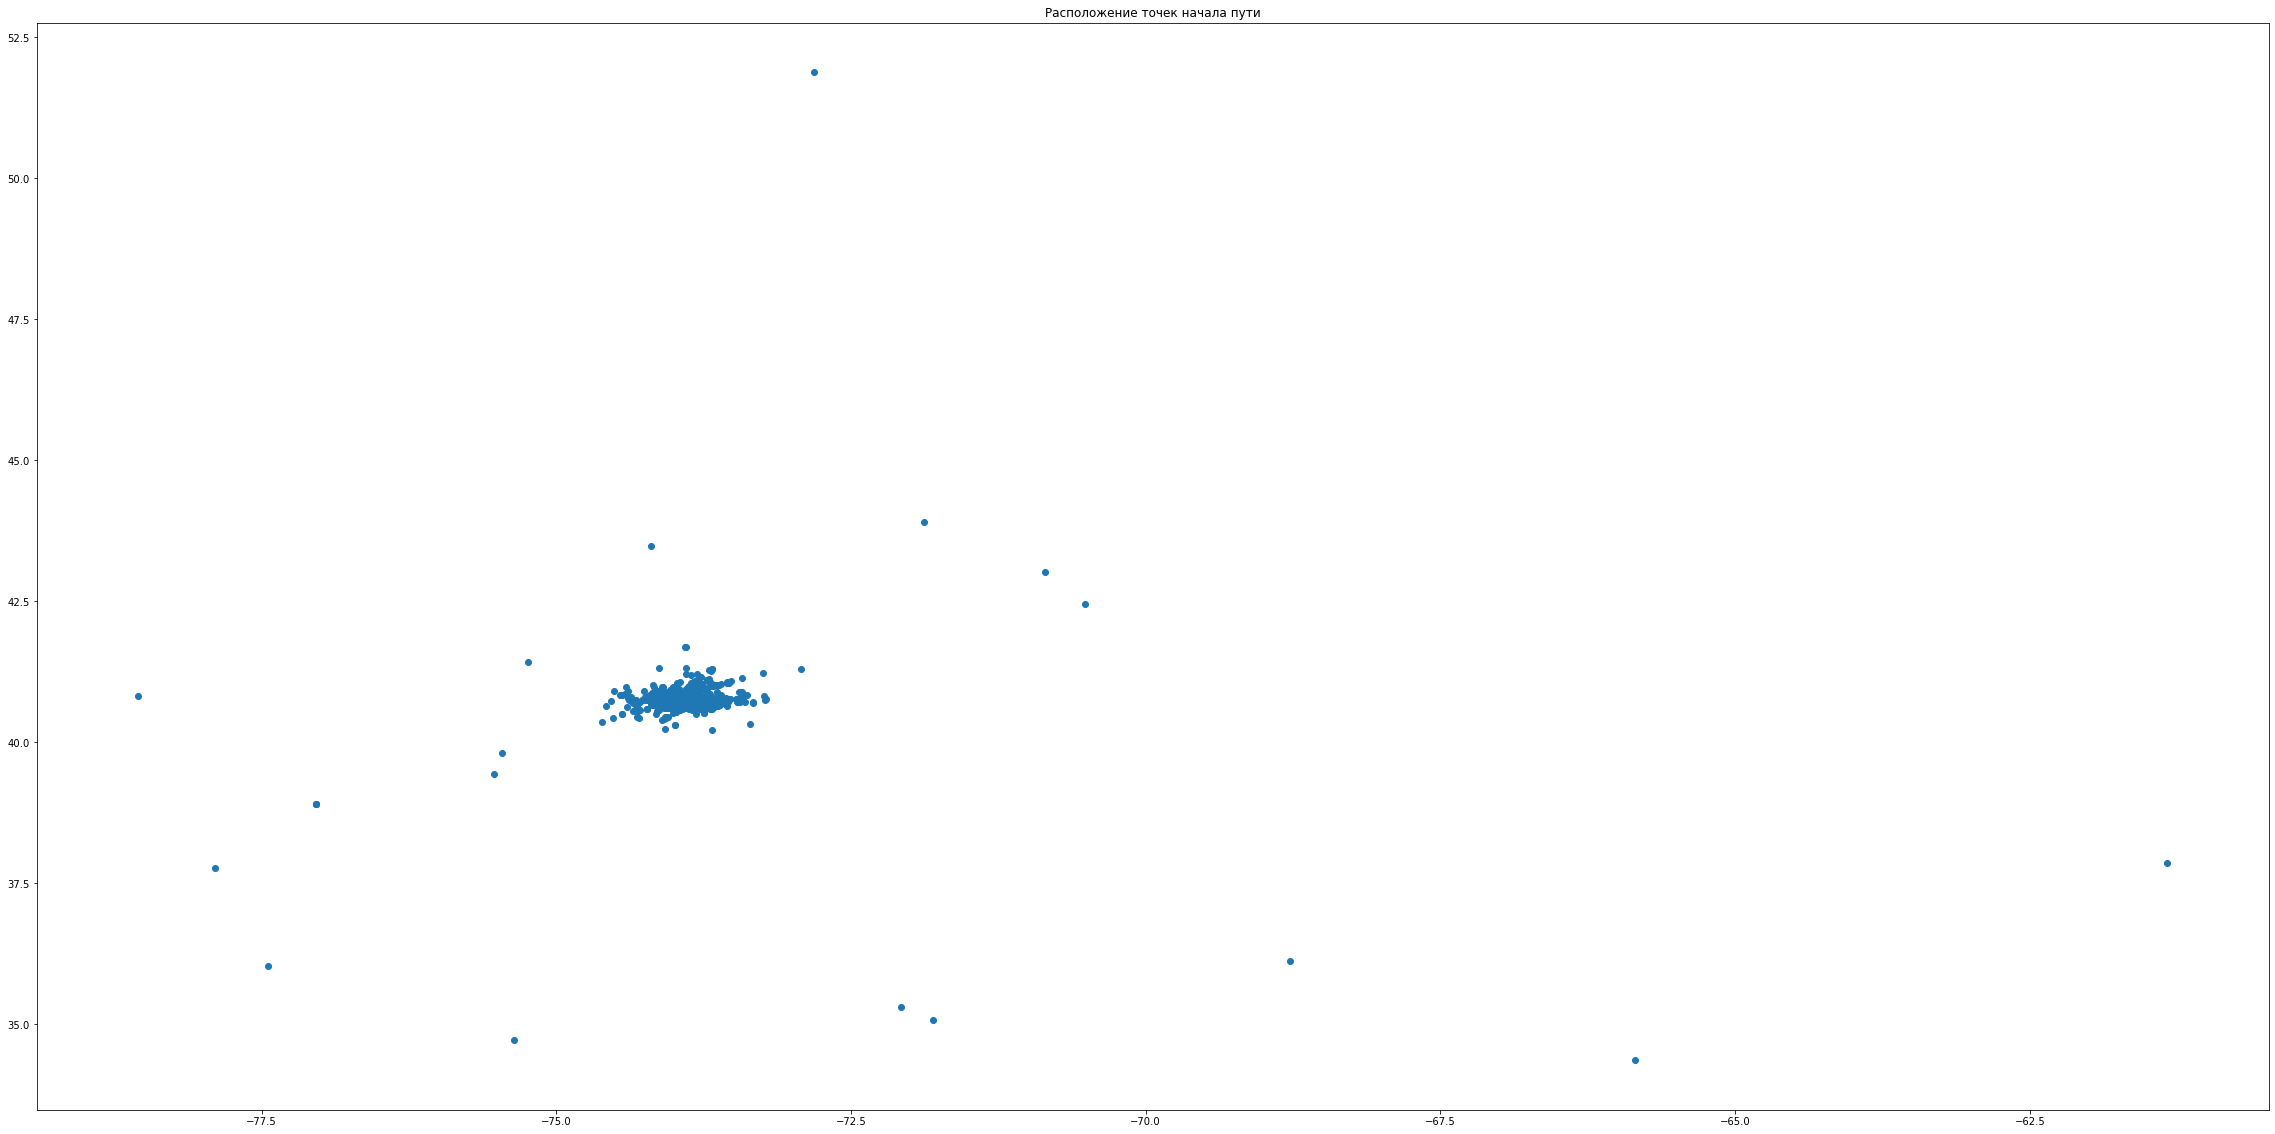

In [98]:

plt.figure(figsize=(40,20))
lon = df.pickup_longitude
lat = df.pickup_latitude

plt.title("Расположение точек начала пути")
plt.scatter(lon,lat)
plt.show()


## кластеризация

In [156]:
data_clustering = list(zip(lon, lat))
data_clustering[:5]

[(-73.98215484619139, 40.76793670654297),
 (-73.97509002685547, 40.758766174316406),
 (-73.9944839477539, 40.74508666992188),
 (-73.94435882568358, 40.7144889831543),
 (-73.952880859375, 40.766468048095696)]

In [157]:
from sklearn.cluster import KMeans
df['cluster'] = KMeans(n_clusters=3).fit_predict(df[['pickup_longitude', 'pickup_latitude']], df[['pickup_longitude', 'pickup_latitude']])
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,...,average temperature,precipitation,snow fall,snow depth,delta_time,time_day,hour,minute,distance,cluster
0,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,455,0,...,45.5,0.29,0.0,0.0,480.0,1,17,24,10606.707,2
1,1,2016-03-14 14:05:00,2016-03-14 14:28:00,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,...,45.5,0.29,0.0,0.0,1380.0,1,14,5,10618.264,2
2,1,2016-03-14 15:04:00,2016-03-14 15:16:00,1,-73.994484,40.745087,-73.998993,40.722710,695,0,...,45.5,0.29,0.0,0.0,720.0,1,15,4,10595.258,0
3,2,2016-03-14 04:24:00,2016-03-14 04:37:00,3,-73.944359,40.714489,-73.910530,40.709492,755,0,...,45.5,0.29,0.0,0.0,780.0,0,4,24,10673.053,0
4,2,2016-03-14 14:57:00,2016-03-14 15:15:00,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,...,45.5,0.29,0.0,0.0,1080.0,1,14,57,10651.433,2


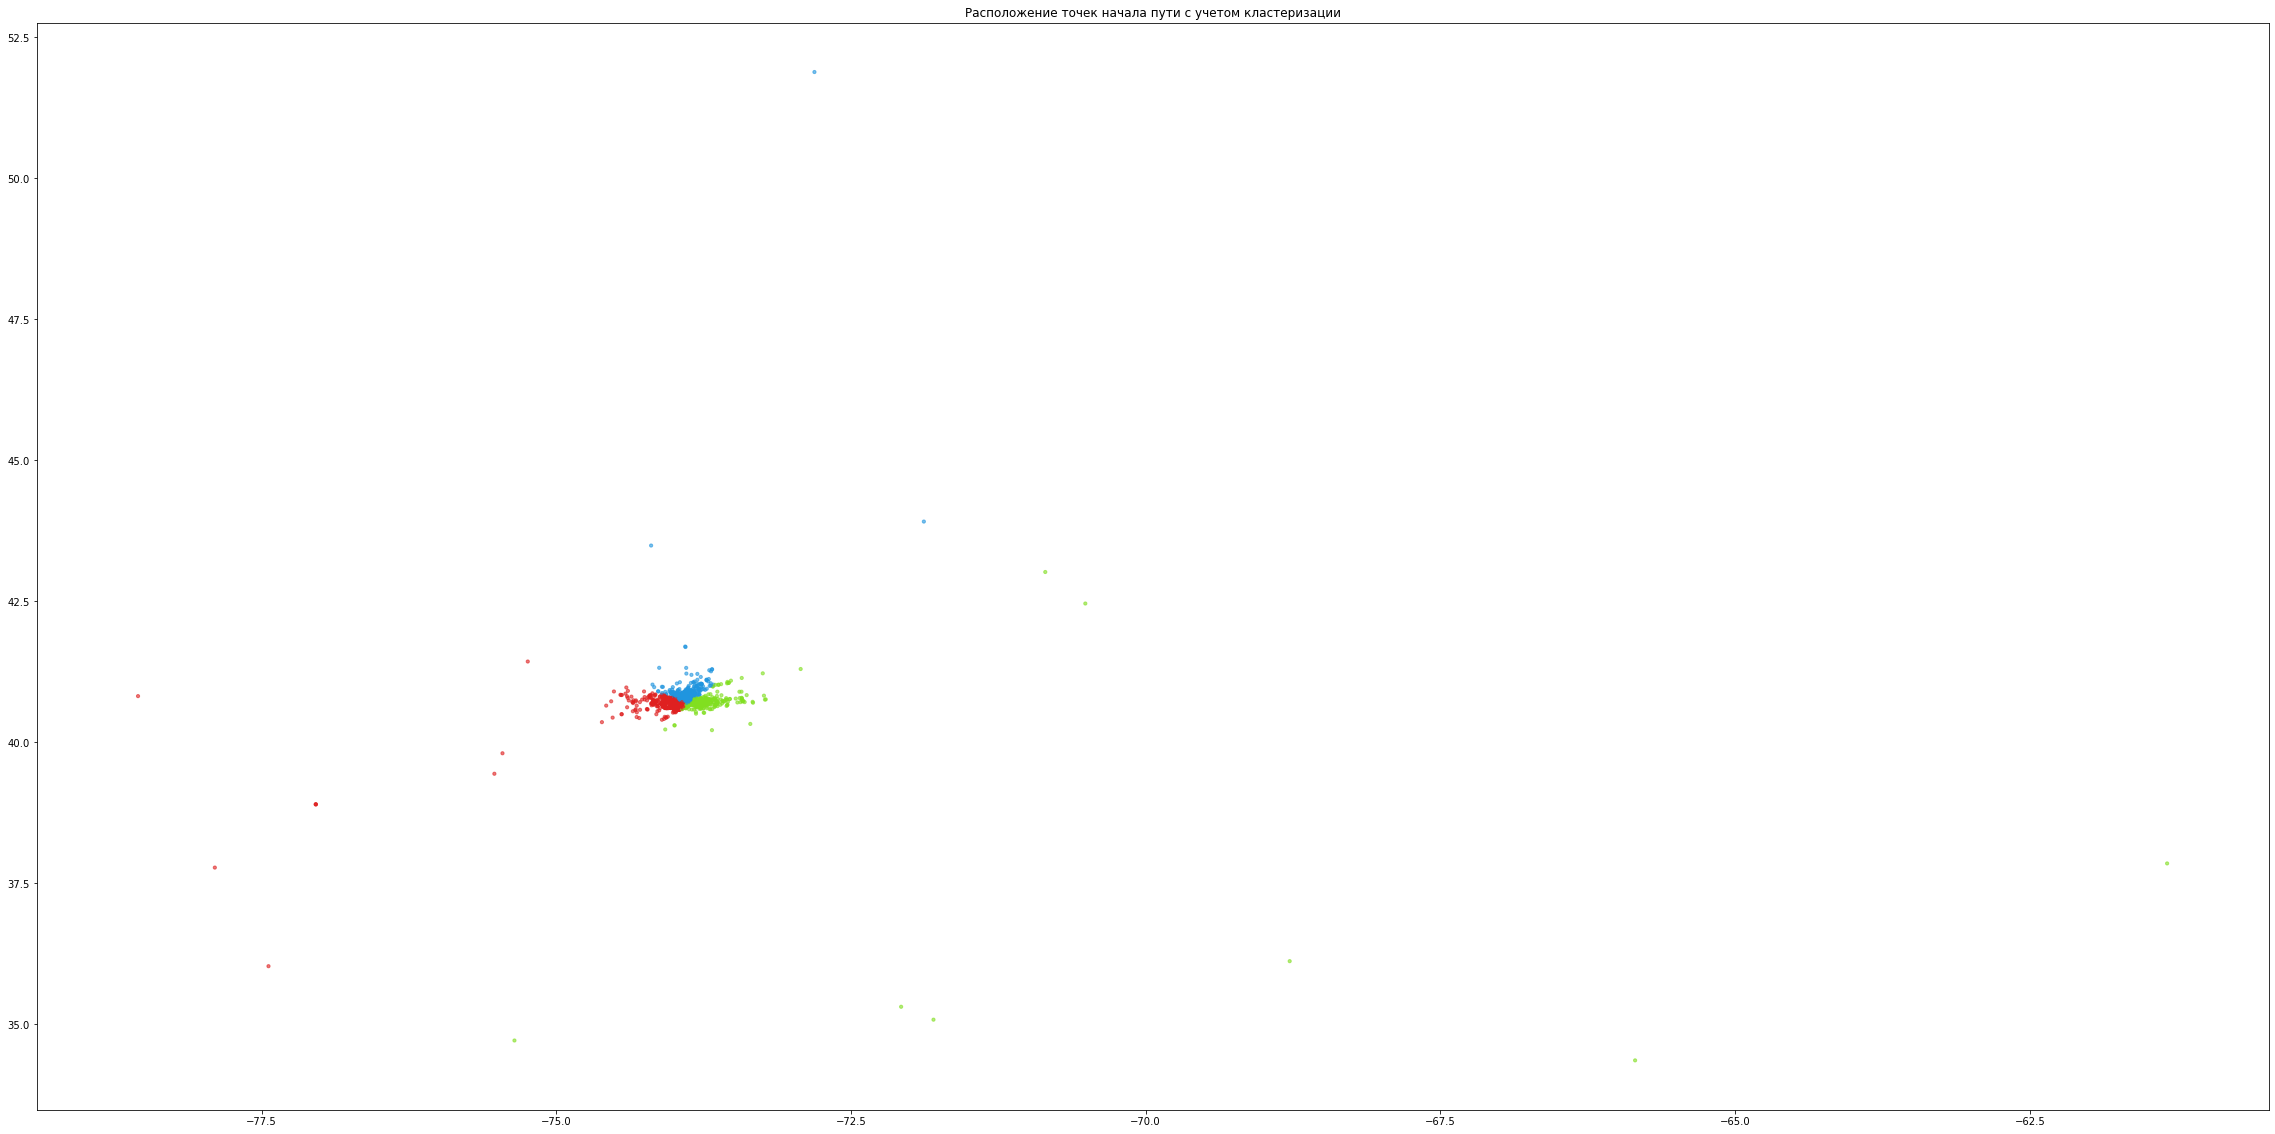

In [158]:

plt.figure(figsize=(40,20))
lon = df.pickup_longitude
lat = df.pickup_latitude

colors = ['#DF2020', '#81DF20', '#2095DF', "#327dA8", "#53F20F"]
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})
plt.scatter(lon, lat, c=df.c, alpha = 0.6, s=10)

plt.title("Расположение точек начала пути с учетом кластеризации")
plt.show()


In [159]:
df = df.drop("c", axis=1)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,...,average temperature,precipitation,snow fall,snow depth,delta_time,time_day,hour,minute,distance,cluster
0,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,455,0,...,45.5,0.29,0.0,0.0,480.0,1,17,24,10606.707,2
1,1,2016-03-14 14:05:00,2016-03-14 14:28:00,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,...,45.5,0.29,0.0,0.0,1380.0,1,14,5,10618.264,2
2,1,2016-03-14 15:04:00,2016-03-14 15:16:00,1,-73.994484,40.745087,-73.998993,40.722710,695,0,...,45.5,0.29,0.0,0.0,720.0,1,15,4,10595.258,0
3,2,2016-03-14 04:24:00,2016-03-14 04:37:00,3,-73.944359,40.714489,-73.910530,40.709492,755,0,...,45.5,0.29,0.0,0.0,780.0,0,4,24,10673.053,0
4,2,2016-03-14 14:57:00,2016-03-14 15:15:00,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,...,45.5,0.29,0.0,0.0,1080.0,1,14,57,10651.433,2


## кодируем кластер спомощью  one hot encoding

In [162]:
df = pd.get_dummies(df, columns = ['cluster'])
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,...,snow fall,snow depth,delta_time,time_day,hour,minute,distance,cluster_0,cluster_1,cluster_2
0,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,455,0,...,0.0,0.0,480.0,1,17,24,10606.707,0,0,1
1,1,2016-03-14 14:05:00,2016-03-14 14:28:00,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,...,0.0,0.0,1380.0,1,14,5,10618.264,0,0,1
2,1,2016-03-14 15:04:00,2016-03-14 15:16:00,1,-73.994484,40.745087,-73.998993,40.722710,695,0,...,0.0,0.0,720.0,1,15,4,10595.258,1,0,0
3,2,2016-03-14 04:24:00,2016-03-14 04:37:00,3,-73.944359,40.714489,-73.910530,40.709492,755,0,...,0.0,0.0,780.0,0,4,24,10673.053,1,0,0
4,2,2016-03-14 14:57:00,2016-03-14 15:15:00,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,...,0.0,0.0,1080.0,1,14,57,10651.433,0,0,1


# визуализация

## построим матриу коррелляции с целевым признаком

<AxesSubplot:title={'center':'Матрица корелляции всех признаков'}>

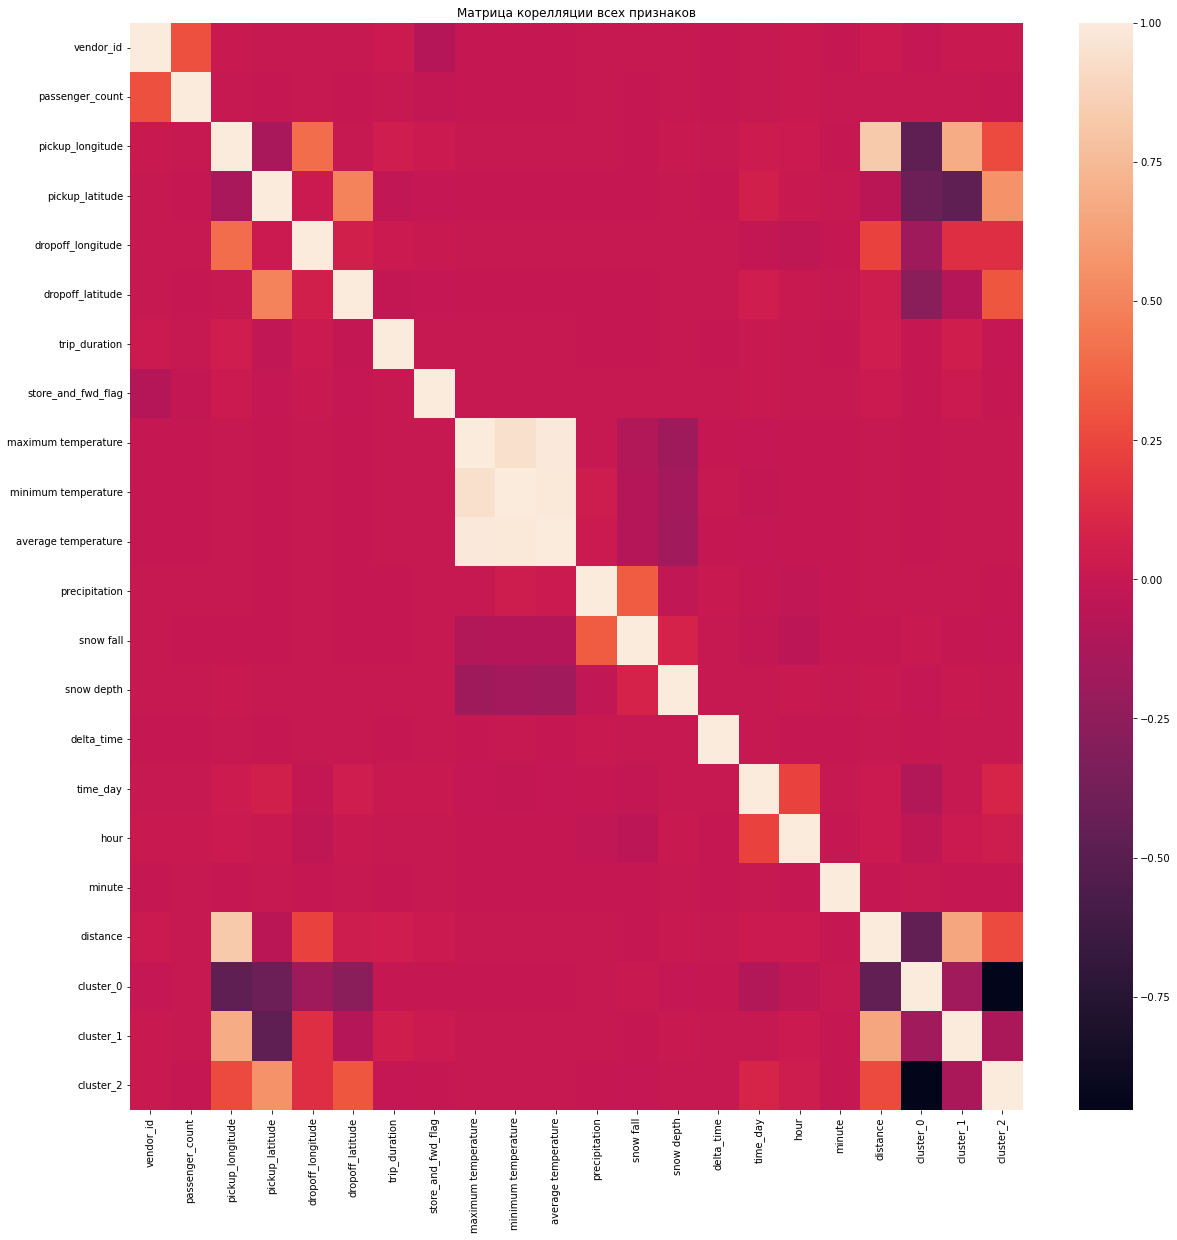

In [165]:
plt.figure(figsize=(20, 20))
plt.title("Матрица корелляции всех признаков")
matrix = df.corr()
sns.heatmap(matrix)

## посмотрим, я какими признаками больше всего кореллирует целевая переменная

In [ ]:
corr_matrix=df.loc[:200].corr()
corr_matrix["Target"].sort_values(ascending=False)

In [173]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,...,snow fall,snow depth,delta_time,time_day,hour,minute,distance,cluster_0,cluster_1,cluster_2
0,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,455,0,...,0.0,0.0,480.0,1,17,24,10606.707,0,0,1
1,1,2016-03-14 14:05:00,2016-03-14 14:28:00,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,...,0.0,0.0,1380.0,1,14,5,10618.264,0,0,1
2,1,2016-03-14 15:04:00,2016-03-14 15:16:00,1,-73.994484,40.745087,-73.998993,40.722710,695,0,...,0.0,0.0,720.0,1,15,4,10595.258,1,0,0
3,2,2016-03-14 04:24:00,2016-03-14 04:37:00,3,-73.944359,40.714489,-73.910530,40.709492,755,0,...,0.0,0.0,780.0,0,4,24,10673.053,1,0,0
4,2,2016-03-14 14:57:00,2016-03-14 15:15:00,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,...,0.0,0.0,1080.0,1,14,57,10651.433,0,0,1


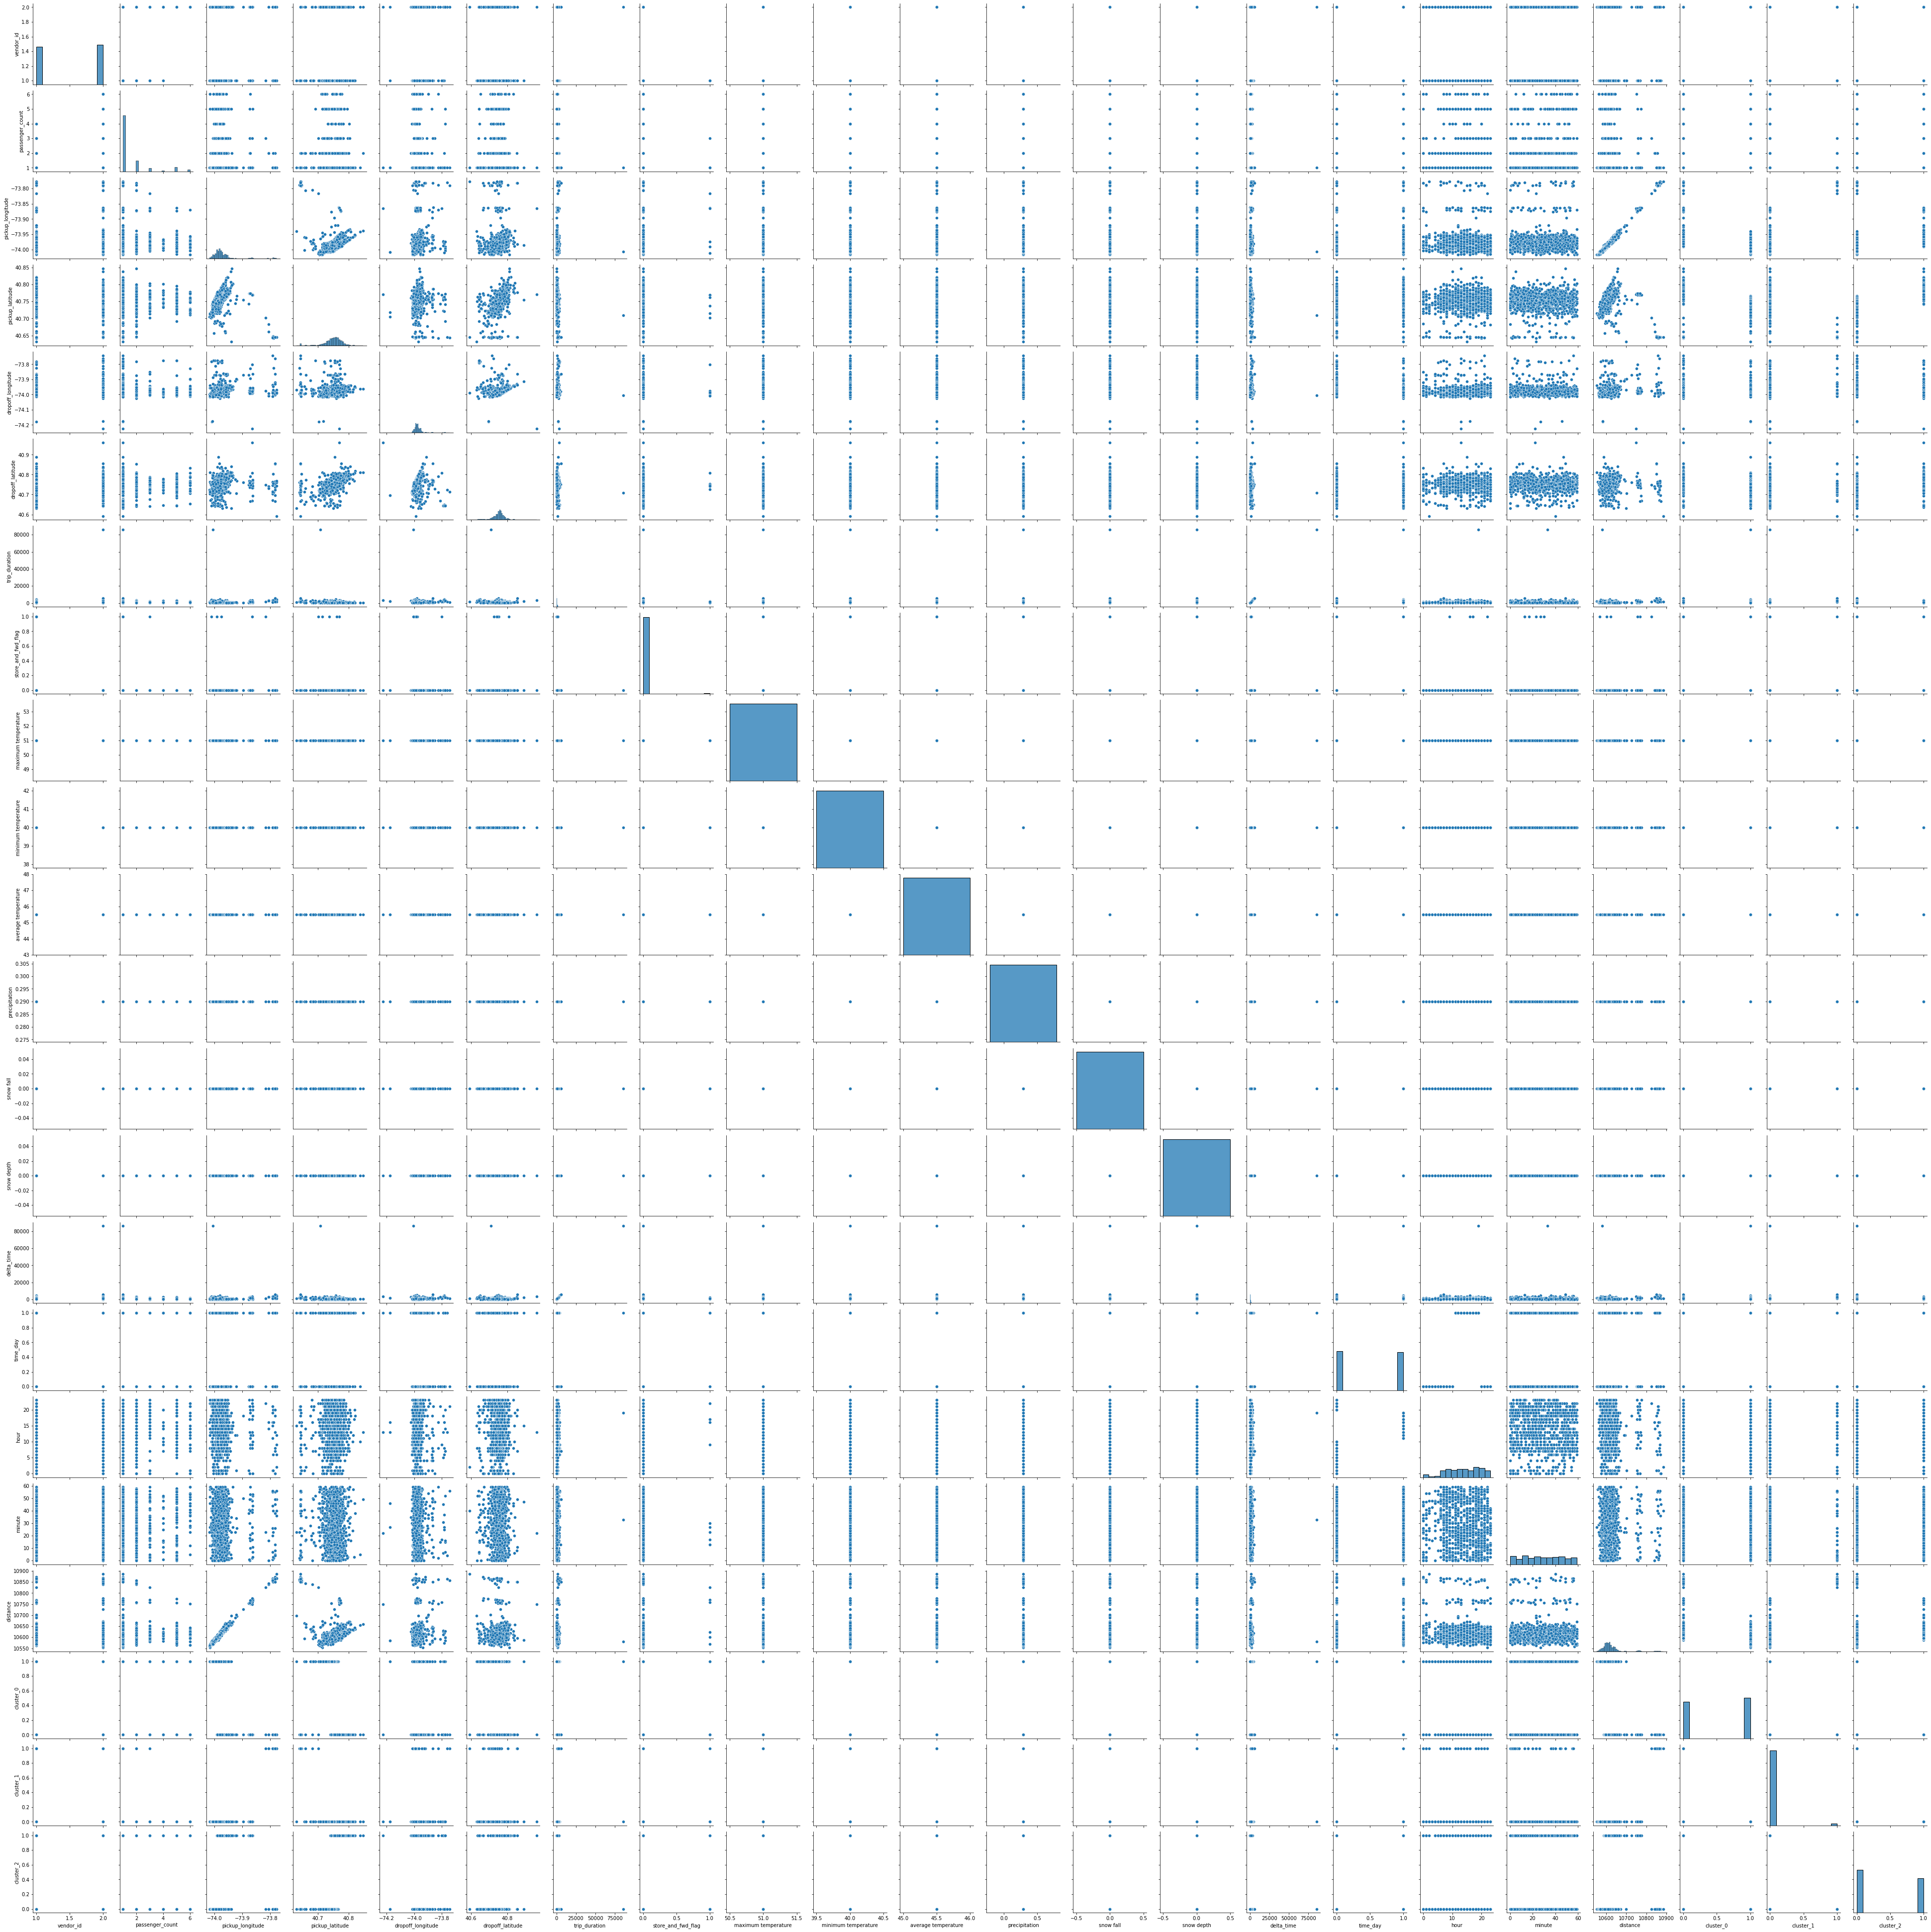

In [176]:
sns.pairplot(df.loc[:1000])

In [187]:
df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,...,snow fall,snow depth,delta_time,time_day,hour,minute,distance,cluster_0,cluster_1,cluster_2
0,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,455,0,...,0.0,0.0,480.0,1,17,24,10606.707,0,0,1
1,1,2016-03-14 14:05:00,2016-03-14 14:28:00,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,...,0.0,0.0,1380.0,1,14,5,10618.264,0,0,1
2,1,2016-03-14 15:04:00,2016-03-14 15:16:00,1,-73.994484,40.745087,-73.998993,40.722710,695,0,...,0.0,0.0,720.0,1,15,4,10595.258,1,0,0
3,2,2016-03-14 04:24:00,2016-03-14 04:37:00,3,-73.944359,40.714489,-73.910530,40.709492,755,0,...,0.0,0.0,780.0,0,4,24,10673.053,1,0,0
4,2,2016-03-14 14:57:00,2016-03-14 15:15:00,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,...,0.0,0.0,1080.0,1,14,57,10651.433,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048589,1,2016-01-10 01:41:00,2016-01-10 01:49:00,3,-73.978745,40.787380,-73.995300,40.764545,466,0,...,0.0,0.0,480.0,0,1,41,10610.841,0,0,1
1048590,1,2016-01-10 08:15:00,2016-01-10 08:20:00,1,-73.954651,40.770100,-73.970146,40.753170,322,0,...,0.0,0.0,300.0,0,8,15,10649.193,0,0,1
1048591,2,2016-01-10 11:21:00,2016-01-10 11:25:00,1,-73.982750,40.735500,-73.995468,40.725319,243,0,...,0.0,0.0,240.0,1,11,21,10614.279,1,0,0
1048592,2,2016-01-10 09:26:00,2016-01-10 09:36:00,1,-73.956581,40.767059,-73.985764,40.740051,584,0,...,0.0,0.0,600.0,0,9,26,10648.490,0,0,1


In [188]:
df = df[df.trip_duration < 20000]

In [189]:
df.shape

(1047107, 24)

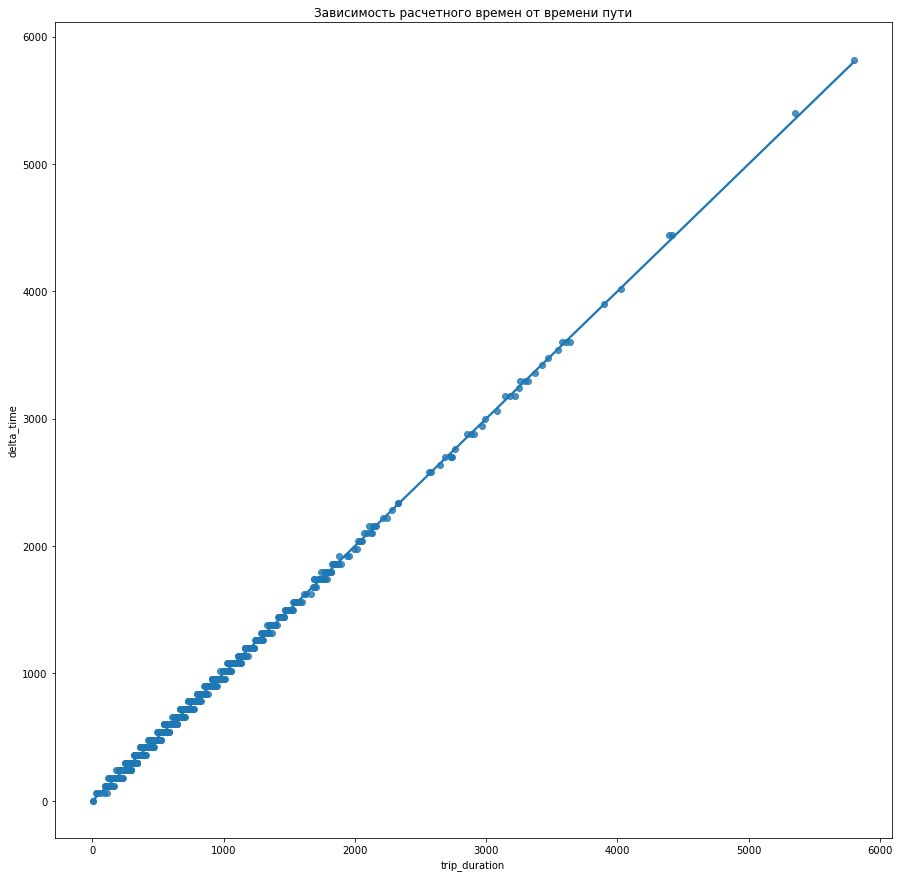

In [194]:
plt.figure(figsize=(15, 15))
plt.title("Зависимость расчетного времени от времени пути")
sns.regplot(x="trip_duration", y="delta_time", data=df.loc[:1000]);



In [210]:
df['trip_duration'].corr(df['delta_time'])

-0.0008357143725139307

## как и ожидалось delta_time хорошо коррелирует с trip_duration

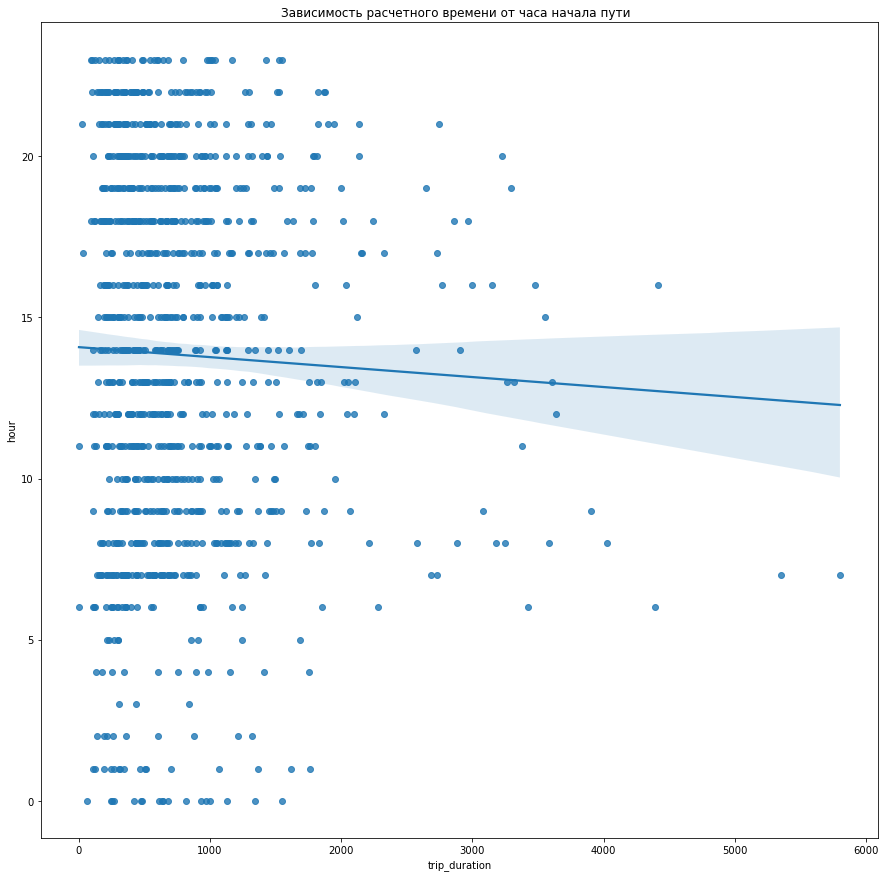

In [195]:
plt.figure(figsize=(15, 15))
plt.title("Зависимость расчетного времени от часа начала пути  ")
sns.regplot(x="trip_duration", y="hour", data=df.loc[:1000]);


## с часом поездки корреляции нет

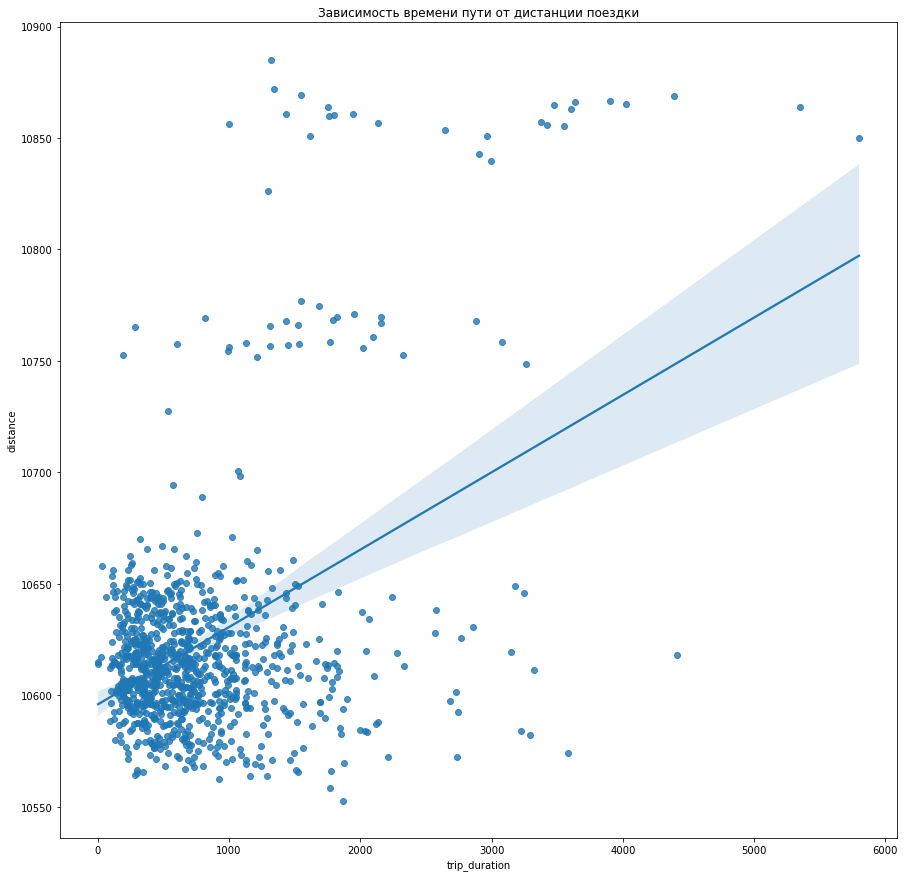

In [196]:
plt.figure(figsize=(15, 15))
plt.title("Зависимость времени пути от дистанции поездки")
sns.regplot(x="trip_duration", y="distance", data=df.loc[:1000]);



## фича может помочь модели, но разброс достаточно велик чтобы опираться только на нее

In [198]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'store_and_fwd_flag',
       'maximum temperature', 'minimum temperature', 'average temperature',
       'precipitation', 'snow fall', 'snow depth', 'delta_time', 'time_day',
       'hour', 'minute', 'distance', 'cluster_0', 'cluster_1', 'cluster_2'],
      dtype='object')

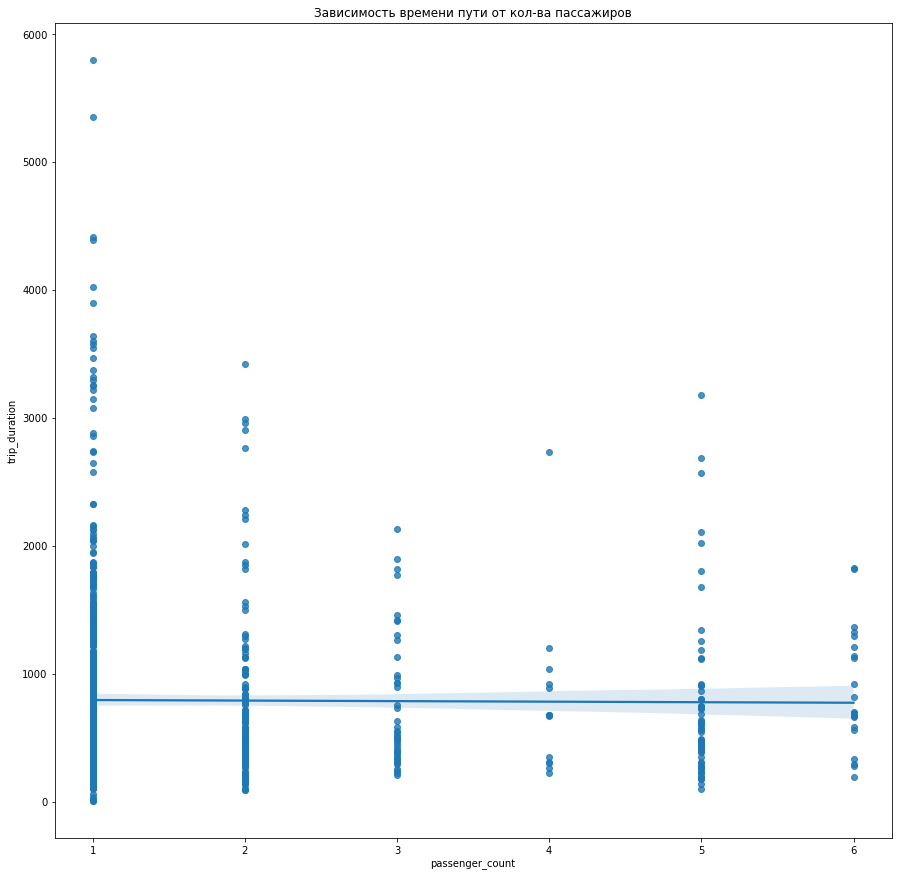

In [205]:
plt.figure(figsize=(15, 15))
plt.title("Зависимость времени пути от кол-ва пассажиров")
sns.regplot(x="passenger_count", y="trip_duration", data=df.loc[:1000]);



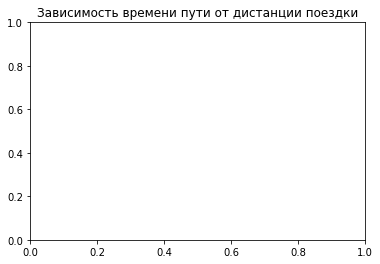

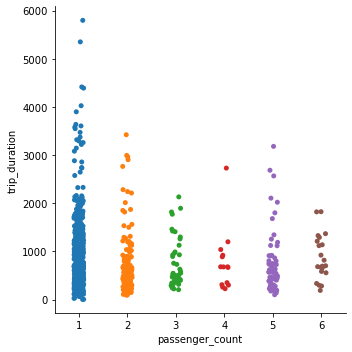

In [209]:
plt.title("Зависимость времени пути от кол-ва пассажиров")
sns.catplot(x='passenger_count',
            y='trip_duration',
            data=df.loc[:1000]);

## зависимость между целевой переменной и кол-во пассажиров есть, но она нелинейная - до 4 пассажиров время маршрута падает, а после возрастает (более большему кол-во людей суммарно выгодно поехать на одном транспорте)

## удалим некорреляционные переменные и переменные, больше не нужные

In [212]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,...,snow fall,snow depth,delta_time,time_day,hour,minute,distance,cluster_0,cluster_1,cluster_2
0,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,455,0,...,0.0,0.0,480.0,1,17,24,10606.707,0,0,1
1,1,2016-03-14 14:05:00,2016-03-14 14:28:00,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,...,0.0,0.0,1380.0,1,14,5,10618.264,0,0,1
2,1,2016-03-14 15:04:00,2016-03-14 15:16:00,1,-73.994484,40.745087,-73.998993,40.722710,695,0,...,0.0,0.0,720.0,1,15,4,10595.258,1,0,0
3,2,2016-03-14 04:24:00,2016-03-14 04:37:00,3,-73.944359,40.714489,-73.910530,40.709492,755,0,...,0.0,0.0,780.0,0,4,24,10673.053,1,0,0
4,2,2016-03-14 14:57:00,2016-03-14 15:15:00,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,...,0.0,0.0,1080.0,1,14,57,10651.433,0,0,1


In [218]:
to_drop = ["pickup_datetime", "dropoff_datetime", "snow fall"]
df = df.drop(to_drop, axis=1)

In [219]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,maximum temperature,minimum temperature,...,precipitation,snow depth,delta_time,time_day,hour,minute,distance,cluster_0,cluster_1,cluster_2
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,0,51,40,...,0.29,0.0,480.0,1,17,24,10606.707,0,0,1
1,1,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,51,40,...,0.29,0.0,1380.0,1,14,5,10618.264,0,0,1
2,1,1,-73.994484,40.745087,-73.998993,40.722710,695,0,51,40,...,0.29,0.0,720.0,1,15,4,10595.258,1,0,0
3,2,3,-73.944359,40.714489,-73.910530,40.709492,755,0,51,40,...,0.29,0.0,780.0,0,4,24,10673.053,1,0,0
4,2,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,51,40,...,0.29,0.0,1080.0,1,14,57,10651.433,0,0,1


In [220]:
df.to_csv("RESULT_C2.csv", index=False)


# ОТЧЕТ

в ходе работы были визуализировны зависимости между целевой переменной и разными признаками
для этого были использованы корреляционные матрицы, различные графики, с выделением интересумого признака
в ходе визуализации были исследованы зависимости между разными наборами призаков и выделены ненужные для модели признаки
было подтверждено несколько гипотез, в том числе:
    гипотеза зависимости времени поездки от числа пассажиров
    гипотеза о зависимости кластера и другие
    
методы визуализации были выбраны в соответствии с поставленной задачей - регрессией т особенностью входнх данных(типом фичи и  разбросом значений)
эти методы оправдали добавление новых признаков, со всем присутствует корреляция, которую сможет использовать в будущем модель
а так же были удалены некорреляционные признаки, которые могли мешать модели в будущем

в руезультате проделанной работы мы получили готовый датасет, на котором можно будет в дальнейшем обучать модель 